# ANN 
* Customer churn prediction using ANN

In [2]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\OM\program by om unde\Machine Learning Practice\Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
df.shape

(7043, 21)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [88]:
df.head(14)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Now We start exploratory data analysis

In [16]:
df.drop('customerID', axis='columns', inplace=True)

In [21]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [26]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
# THERE IS ERROR BECAUSE THERE IS SPACE BETWEEN THE STRINGS
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [5]:
# The errors='coerce' parameter tells pandas to convert invalid parsing to NaN (Not a Number) instead of raising an error
pd.to_numeric(df.TotalCharges, errors='coerce').isnull() #This is not the change in the orignal dataset as there is no 'inplace=True'

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [32]:
df.shape

(7043, 20)

In [33]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [41]:
df.iloc[488]['TotalCharges']

' '

In [42]:
df1 = df[df.TotalCharges != " "]
df1.shape

(7032, 20)

In [53]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\OM\AppData\Local\Temp\ipykernel_10680\3157282470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges= pd.to_numeric(df1.TotalCharges)


In [54]:
pd.to_numeric(df1['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [58]:
df1.TotalCharges.dtypes

dtype('float64')

In [87]:
#No. of yes and no in the tenure by comparing tenure year and churn calculating
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

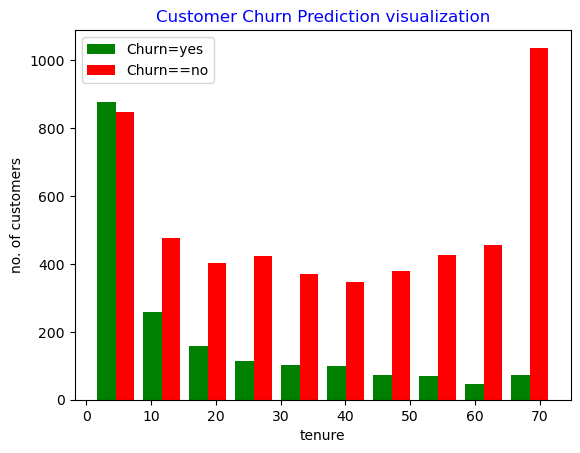

In [109]:
plt.xlabel('tenure')
plt.ylabel('no. of customers')
plt.title('Customer Churn Prediction visualization', color='Blue')
plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'], label=['Churn=yes', 'Churn==no'])
plt.legend()

In [139]:
#It is used to print the unique values in the each attribute of the dataset
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

# Now we start cleaning of the dataset 

In [144]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


# Here start doing Label Encoding

In [155]:
#We replaced 'No internet service' with no as it means no only thats why 
#Also like that we replace the 'No phone service' with no
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\OM\AppData\Local\Temp\ipykernel_10680\3279989644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\OM\AppData\Local\Temp\ipykernel_10680\3279989644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [157]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
MultipleLines: ['No' 0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1 'No']
OnlineBackup: [1 0 'No']
DeviceProtection: [0 1 'No']
TechSupport: [0 1 'No']
StreamingTV: [0 1 'No']
StreamingMovies: [0 1 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [158]:
# Now we want to convert the yes or no categorical value into binary 
# so we declare an array as yes_no_col which contains yes or no values only
yes_no_col= ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV'
             ,'StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    df1[col].replace({'Yes':1,'No':0}, inplace=True)

C:\Users\OM\AppData\Local\Temp\ipykernel_10680\1357024142.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0}, inplace=True)


In [162]:
#Here you can see we replaced yes and no with 1 and 0
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [163]:
#NOw repalce male and female with 0 and 1 in gender column
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\OM\AppData\Local\Temp\ipykernel_10680\3528654347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [167]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [169]:
# pd.get_dummies() in pandas converts categorical variables into dummy/indicator variables, essentially creating binary (0 or 1) columns for each category
#Here 'InternetService' has 3 categorical values so we coverted them into seperate binary values by dividing them as DSL> Fiber optic > No
#So we kept DSL:1, No:0, Fiber optic:0
#Like that smae we will do in contract and Paymentmethod
pd.get_dummies(data=df1,columns=['InternetService','PaymentMethod','Contract'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,0,0,1,0,1,0
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [170]:
#Here we decalre this all process into new 'df'
df2= pd.get_dummies(data=df1,columns=['InternetService','PaymentMethod','Contract'])

In [172]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [173]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Now we start Scalling

In [181]:
# List of columns to be scaled
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the specified columns using MinMaxScaler
# scaler.fit_transform() calculates the minimum and maximum values of each column
# and then scales the values between 0 and 1 using the formula:
# scaled_value = (original_value - min_value) / (max_value - min_value)
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [182]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [183]:
x=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [187]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=5)

In [188]:
x_train.shape

(5625, 26)

In [190]:
x_test.shape

(1407, 26)

In [194]:
import tensorflow as tf
from tensorflow import keras

model= keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 2s 3ms/step - loss: 0.5329 - accuracy: 0.7225
Epoch 2/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4388 - accuracy: 0.7847
Epoch 3/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4238 - accuracy: 0.7947
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4187 - accuracy: 0.7970
Epoch 5/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4158 - accuracy: 0.7993
Epoch 6/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8030
Epoch 7/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4130 - accuracy: 0.8043
Epoch 8/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8032
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4109 - accuracy: 0.8075
Epoch 10/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8052

In [196]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4443 - accuracy: 0.7960


[0.44428813457489014, 0.7960199117660522]

In [209]:
yp=model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.23575462],
       [0.30330026],
       [0.01482255],
       [0.7623251 ],
       [0.5312782 ]], dtype=float32)

In [210]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [211]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [212]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [219]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       999
           1       0.70      0.53      0.60       408

    accuracy                           0.80      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

